In [1]:
# IMPORTING LIBRARIES 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [2]:
# READING DATASET
breast_cancer_df=pd.read_csv('breast-cancer.csv.xls')
breast_cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# CHECKING FOR NULL VALUES
breast_cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# CREATING DATAAFRAME WITH SELECTED FEATURES
selected_columns=['area_worst','perimeter_worst','concave points_mean','concavity_mean','perimeter_mean','area_mean','area_se','radius_worst','concave points_worst','smoothness_worst','diagnosis']
Featured_df=breast_cancer_df[selected_columns]


In [5]:
Featured_df

,area_worst,perimeter_worst,concave points_mean,concavity_mean,perimeter_mean,area_mean,area_se,radius_worst,concave points_worst,smoothness_worst,diagnosis
0,2019.0,184.60,0.14710,0.30010,122.80,1001.0,153.40,25.380,0.2654,0.16220,M
1,1956.0,158.80,0.07017,0.08690,132.90,1326.0,74.08,24.990,0.1860,0.12380,M
2,1709.0,152.50,0.12790,0.19740,130.00,1203.0,94.03,23.570,0.2430,0.14440,M
3,567.7,98.87,0.10520,0.24140,77.58,386.1,27.23,14.910,0.2575,0.20980,M
4,1575.0,152.20,0.10430,0.19800,135.10,1297.0,94.44,22.540,0.1625,0.13740,M
...,...,...,...,...,...,...,...,...,...,...,...
564,2027.0,166.10,0.13890,0.24390,142.00,1479.0,158.70,25.450,0.2216,0.14100,M
565,1731.0,155.00,0.09791,0.14400,131.20,1261.0,99.04,23.690,0.1628,0.11660,M
566,1124.0,126.70,0.05302,0.09251,108.30,858.1,48.55,18.980,0.1418,0.11390,M
567,1821.0,184.60,0.15200,0.35140,140.10,1265.0,86.22,25.740,0.2650,0.16500,M


In [6]:
# CHECKING NULL VALUES IN NEW SELECTED FEATURES DATA FRAME
Featured_df.isnull().sum()

area_worst              0
perimeter_worst         0
concave points_mean     0
concavity_mean          0
perimeter_mean          0
area_mean               0
area_se                 0
radius_worst            0
concave points_worst    0
smoothness_worst        0
diagnosis               0
dtype: int64

In [7]:
# CHECKING ALL FEATURES MATHIMATICAL 
Featured_df.describe()

,area_worst,perimeter_worst,concave points_mean,concavity_mean,perimeter_mean,area_mean,area_se,radius_worst,concave points_worst,smoothness_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,880.583128,107.261213,0.048919,0.088799,91.969033,654.889104,40.337079,16.269190,0.114606,0.132369
std,569.356993,33.602542,0.038803,0.079720,24.298981,351.914129,45.491006,4.833242,0.065732,0.022832
min,185.200000,50.410000,0.000000,0.000000,43.790000,143.500000,6.802000,7.930000,0.000000,0.071170
25%,515.300000,84.110000,0.020310,0.029560,75.170000,420.300000,17.850000,13.010000,0.064930,0.116600
50%,686.500000,97.660000,0.033500,0.061540,86.240000,551.100000,24.530000,14.970000,0.099930,0.131300
75%,1084.000000,125.400000,0.074000,0.130700,104.100000,782.700000,45.190000,18.790000,0.161400,0.146000
max,4254.000000,251.200000,0.201200,0.426800,188.500000,2501.000000,542.200000,36.040000,0.291000,0.222600


In [8]:

corr_relation=Featured_df.corr()

/var/folders/b3/3yzhdb7s4nz7k_52dth9bqz40000gn/T/ipykernel_20253/2061744455.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_relation=Featured_df.corr()


<Axes: >

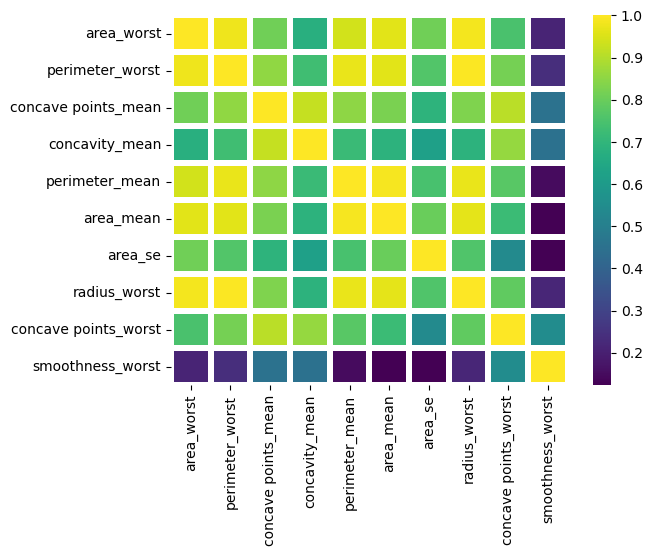

In [9]:
# VISUALIZATION OF COO RELATION 
sns.heatmap(corr_relation,cmap='viridis',linewidths=4)

<Axes: >

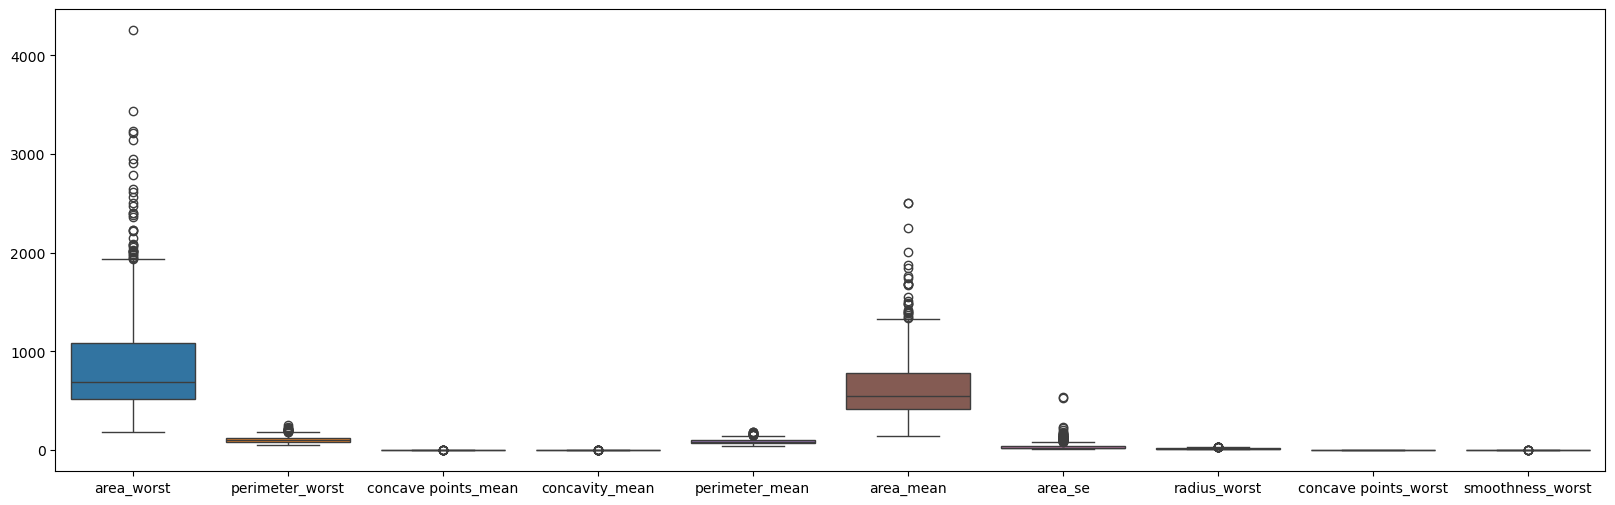

In [10]:
# CHECKING FOR OUTLERS 
plt.figure(figsize=(20,6))
sns.boxplot(data=Featured_df)

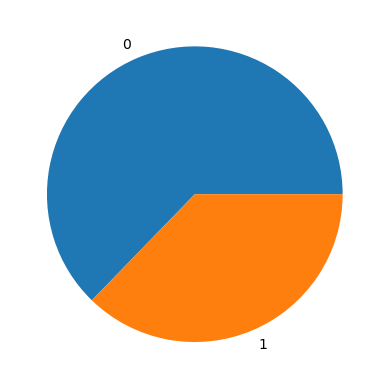

In [63]:
grouby=Featured_df.groupby('diagnosis')['area_worst'].count()
plt.pie(grouby.values,labels=grouby.index)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


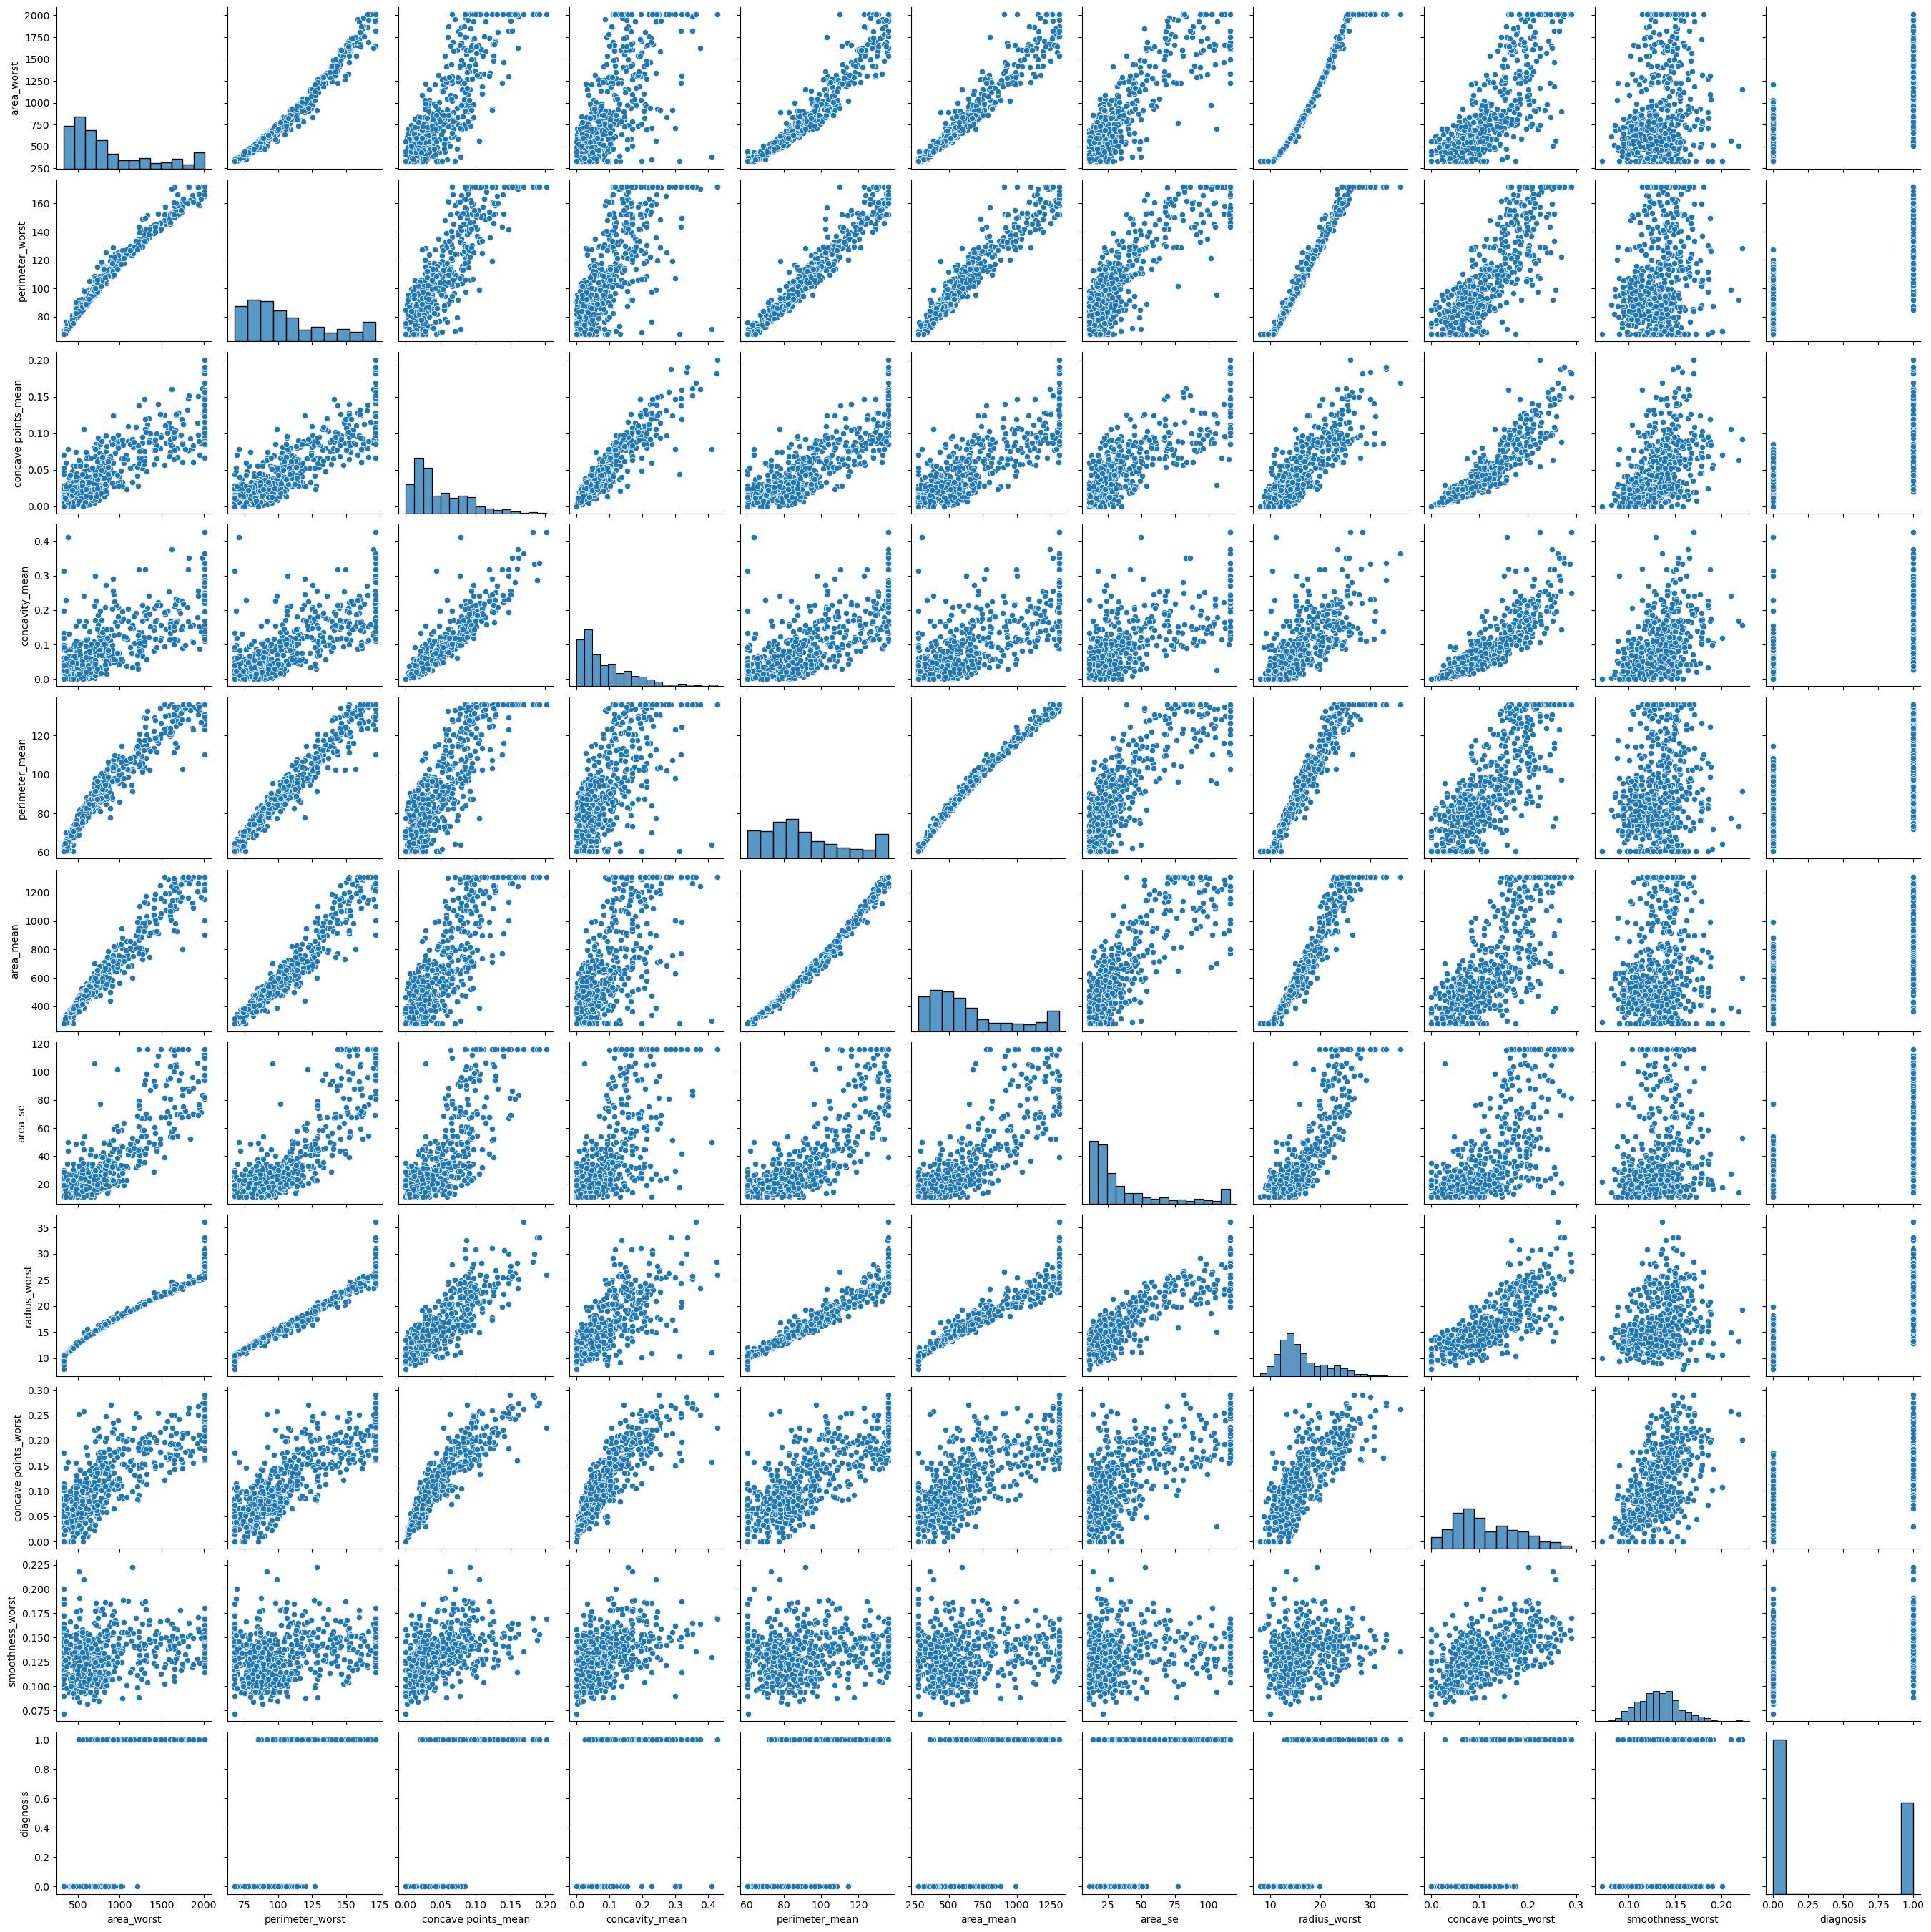

In [53]:
sns.pairplot(data=Featured_df)
plt.show()

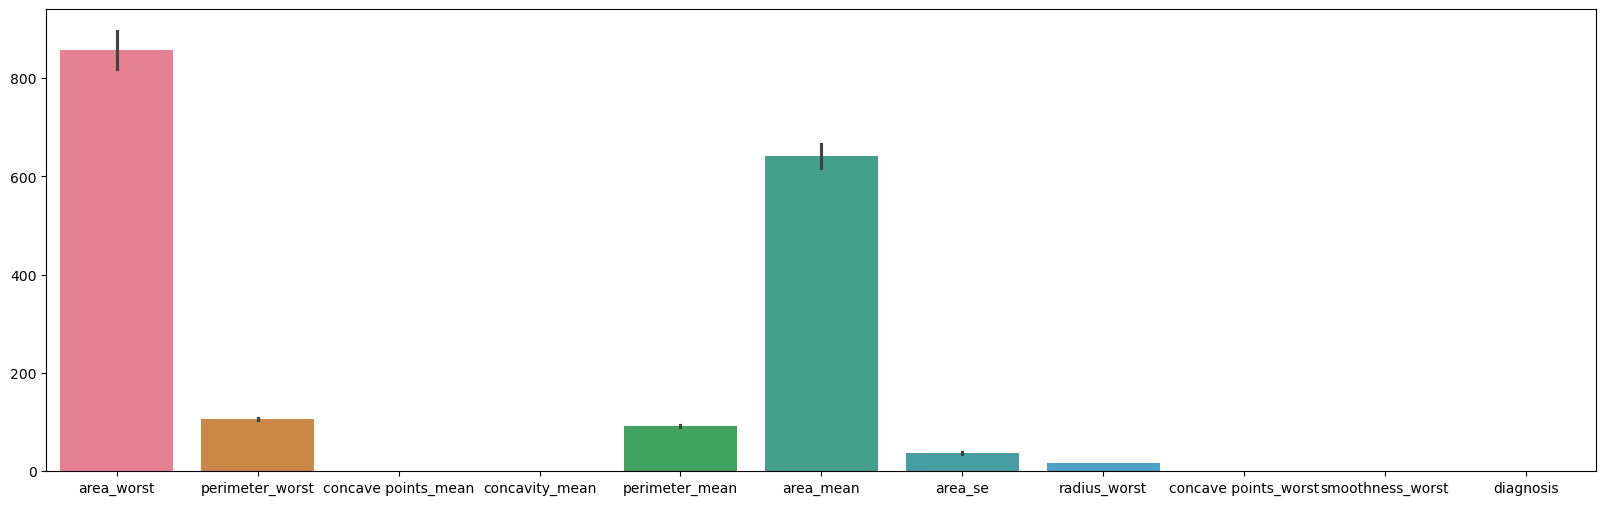

In [55]:
plt.figure(figsize=(20,6))
sns.barplot(data=Featured_df)
plt.show()

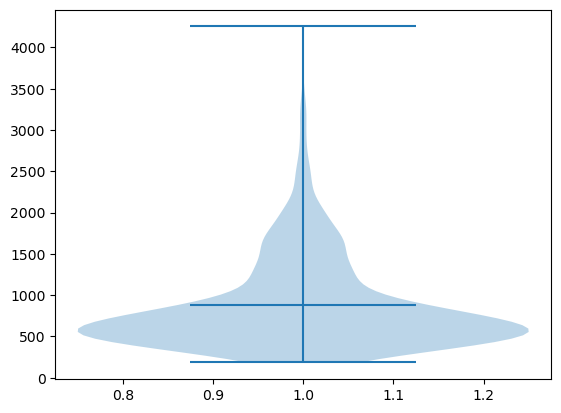

In [11]:
# VIOLIN PLOT 
plt.violinplot(Featured_df['area_worst'],showmeans=True)
plt.show()

In [12]:
# HANDLING OUTLIERS 
# Calculate the lower and upper bounds for the selected columns
lower_bound = Featured_df[['area_worst', 'area_mean', 'perimeter_worst', 'area_se', 'perimeter_mean']].quantile(0.05)
upper_bound = Featured_df[['area_worst', 'area_mean', 'perimeter_worst', 'area_se', 'perimeter_mean']].quantile(0.95)

# Cap values outside the bounds
Featured_df[['area_worst', 'area_mean', 'perimeter_worst', 'area_se', 'perimeter_mean']] = Featured_df[
    ['area_worst', 'area_mean', 'perimeter_worst', 'area_se', 'perimeter_mean']
].clip(lower=lower_bound, upper=upper_bound,axis=1)


/var/folders/b3/3yzhdb7s4nz7k_52dth9bqz40000gn/T/ipykernel_20253/4283231862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Featured_df[['area_worst', 'area_mean', 'perimeter_worst', 'area_se', 'perimeter_mean']] = Featured_df[


<Axes: >

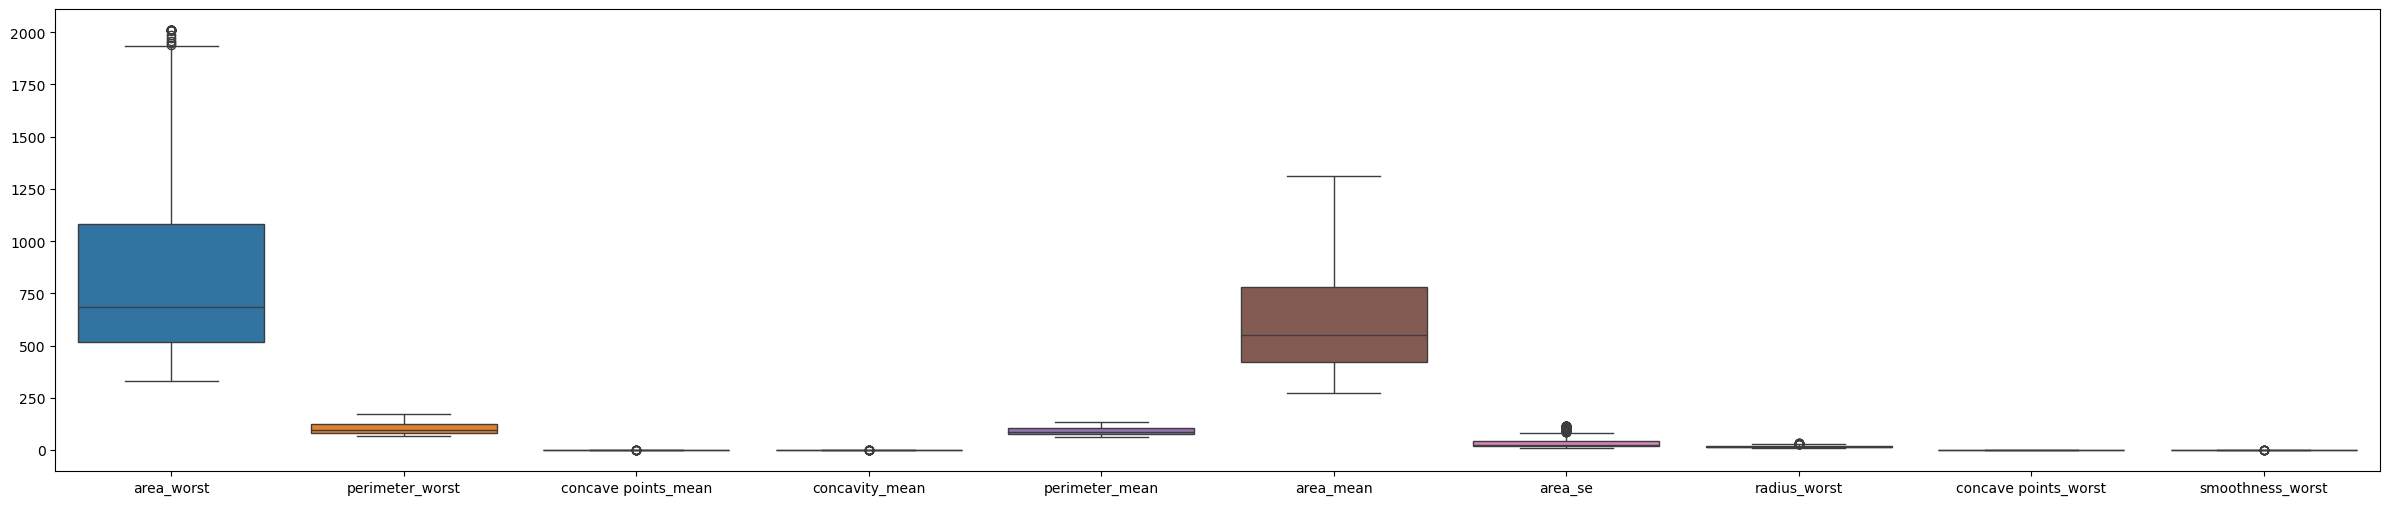

In [13]:
# AFTER HANDLING OUTLIERS CHECKING AGAIN 
plt.figure(figsize=(30,6))
sns.boxplot(data=Featured_df)

In [14]:
Featured_df.columns

Index(['area_worst', 'perimeter_worst', 'concave points_mean',
       'concavity_mean', 'perimeter_mean', 'area_mean', 'area_se',
       'radius_worst', 'concave points_worst', 'smoothness_worst',
       'diagnosis'],
      dtype='object')

<Axes: >

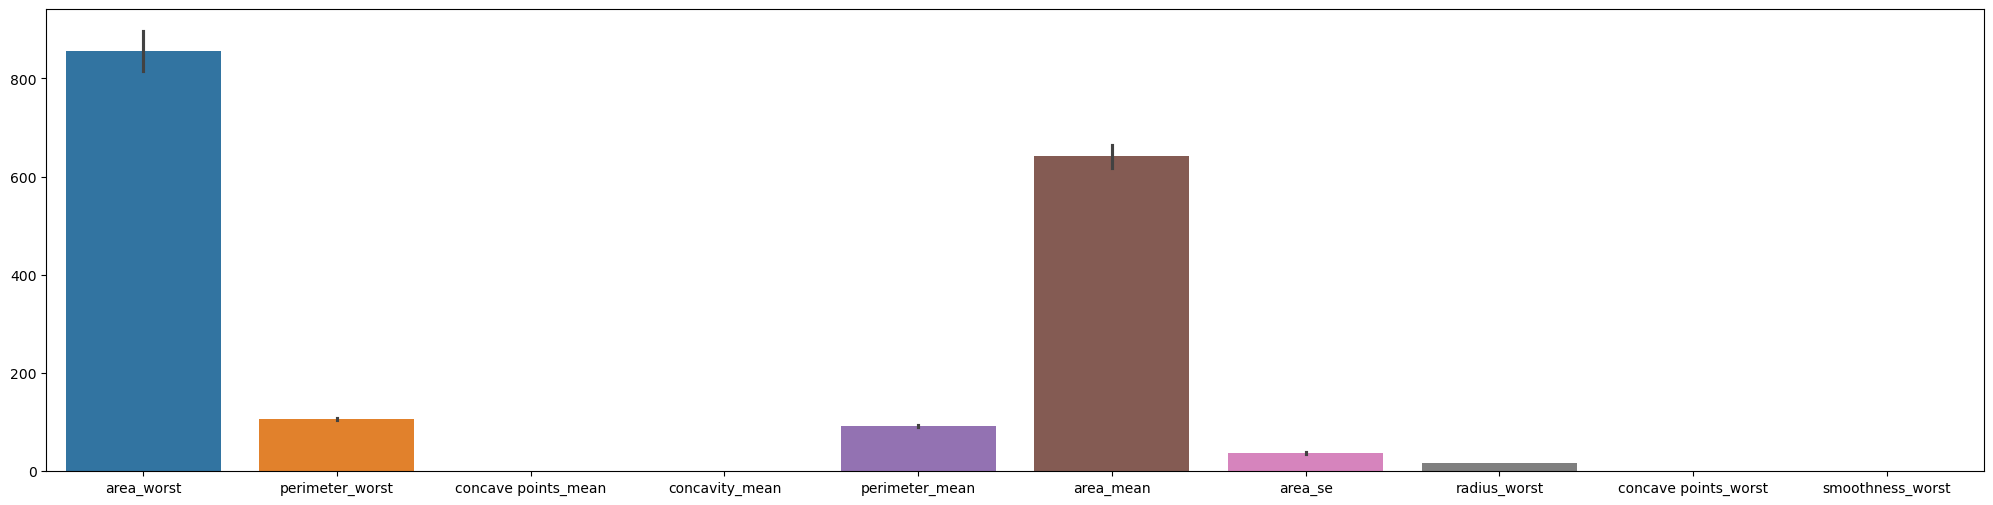

In [15]:
# VISUALING BAR PLOT

plt.figure(figsize=(25,6))
sns.barplot(data=Featured_df)

In [16]:
Featured_df

,area_worst,perimeter_worst,concave points_mean,concavity_mean,perimeter_mean,area_mean,area_se,radius_worst,concave points_worst,smoothness_worst,diagnosis
0,2009.60,171.640,0.14710,0.30010,122.800,1001.00,115.80,25.380,0.2654,0.16220,M
1,1956.00,158.800,0.07017,0.08690,132.900,1309.80,74.08,24.990,0.1860,0.12380,M
2,1709.00,152.500,0.12790,0.19740,130.000,1203.00,94.03,23.570,0.2430,0.14440,M
3,567.70,98.870,0.10520,0.24140,77.580,386.10,27.23,14.910,0.2575,0.20980,M
4,1575.00,152.200,0.10430,0.19800,135.100,1297.00,94.44,22.540,0.1625,0.13740,M
...,...,...,...,...,...,...,...,...,...,...,...
564,2009.60,166.100,0.13890,0.24390,135.820,1309.80,115.80,25.450,0.2216,0.14100,M
565,1731.00,155.000,0.09791,0.14400,131.200,1261.00,99.04,23.690,0.1628,0.11660,M
566,1124.00,126.700,0.05302,0.09251,108.300,858.10,48.55,18.980,0.1418,0.11390,M
567,1821.00,171.640,0.15200,0.35140,135.820,1265.00,86.22,25.740,0.2650,0.16500,M


In [17]:
# CONVERTING TARGET FEARURES INTO BINARY 
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
Featured_df['diagnosis']=LB.fit_transform(Featured_df['diagnosis'])

/var/folders/b3/3yzhdb7s4nz7k_52dth9bqz40000gn/T/ipykernel_20253/2961725919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Featured_df['diagnosis']=LB.fit_transform(Featured_df['diagnosis'])


In [18]:
# SELECTING FEATURES FOR X AND Y 
X=Featured_df.drop('diagnosis',axis=1)
Y=Featured_df['diagnosis']

In [19]:
Featured_df

,area_worst,perimeter_worst,concave points_mean,concavity_mean,perimeter_mean,area_mean,area_se,radius_worst,concave points_worst,smoothness_worst,diagnosis
0,2009.60,171.640,0.14710,0.30010,122.800,1001.00,115.80,25.380,0.2654,0.16220,1
1,1956.00,158.800,0.07017,0.08690,132.900,1309.80,74.08,24.990,0.1860,0.12380,1
2,1709.00,152.500,0.12790,0.19740,130.000,1203.00,94.03,23.570,0.2430,0.14440,1
3,567.70,98.870,0.10520,0.24140,77.580,386.10,27.23,14.910,0.2575,0.20980,1
4,1575.00,152.200,0.10430,0.19800,135.100,1297.00,94.44,22.540,0.1625,0.13740,1
...,...,...,...,...,...,...,...,...,...,...,...
564,2009.60,166.100,0.13890,0.24390,135.820,1309.80,115.80,25.450,0.2216,0.14100,1
565,1731.00,155.000,0.09791,0.14400,131.200,1261.00,99.04,23.690,0.1628,0.11660,1
566,1124.00,126.700,0.05302,0.09251,108.300,858.10,48.55,18.980,0.1418,0.11390,1
567,1821.00,171.640,0.15200,0.35140,135.820,1265.00,86.22,25.740,0.2650,0.16500,1


In [20]:
# SPLITING THE DATASET INTO TRAIN AND TEST 
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y, test_size=0.2,random_state=10)


In [21]:
# NORMALIZATION OF DATASET 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_TRAIN=sc.fit_transform(X_TRAIN)
X_TEST=sc.transform(X_TEST)

In [22]:
# IMPLEMENTING LOGISTIC REGRESSION MODEL 
from sklearn.linear_model import LogisticRegression
model_LG=LogisticRegression(random_state=10)
model_LG.fit(X_TRAIN,Y_TRAIN)

LogisticRegression(random_state=10)

In [23]:
# PREDICTING OF X_TEST


LG_pred=model_LG.predict(X_TEST)

In [24]:
# COMPUTING ACCURACY SCORE , CONFUSION MATRIX , CLASSIFICATION REPORT OF LOGISRIC REGRESSION 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

CM_LG=confusion_matrix(Y_TEST,LG_pred)
ACCURACY_SCORE_LG=accuracy_score(Y_TEST,LG_pred)
PERC_ASCORE =ACCURACY_SCORE_LG*100
REPORT_LG=classification_report(Y_TEST,LG_pred)


print(f'THE CONFUSION MATRIX FOR LOGISTIC REGRESSION IS {CM_LG}')
print(f'THE ACCURACY SCORE OF LOGISTIC REGRESSION IS {PERC_ASCORE}%')
print(f'THE CLASSFICATION REPORT IS FOR LOGISTIC REGRESSION IS {REPORT_LG}')



THE CONFUSION MATRIX FOR LOGISTIC REGRESSION IS [[74  1]
 [ 1 38]]
THE ACCURACY SCORE OF LOGISTIC REGRESSION IS 98.24561403508771%
THE CLASSFICATION REPORT IS FOR LOGISTIC REGRESSION IS               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [25]:
# CROSS VALIDAITON OF LOGISTIC REGRESSION 

from sklearn.model_selection import cross_val_score
cross_val_lg=cross_val_score(estimator=model_LG,X=X_TRAIN,y=Y_TRAIN,cv=10)
perc_cross_lg=format(cross_val_lg.mean())
print(f'THE CROSS VALIDATION FOR LOGISTICS REGRESSION IS {perc_cross_lg}%')

THE CROSS VALIDATION FOR LOGISTICS REGRESSION IS 0.9448309178743962%


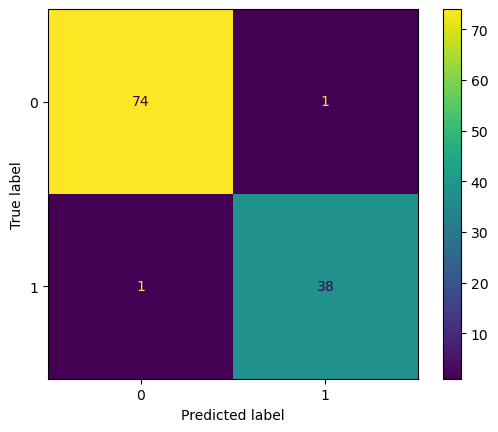

In [26]:
# VISUALAZTION OF CONFUSION MATRIX 

display_LG=ConfusionMatrixDisplay(confusion_matrix=CM_LG, display_labels=model_LG.classes_)
display_LG.plot()

THE FALSE POSITIVE RATES ARE [0.         0.         0.         0.01333333 0.01333333 0.02666667
 0.02666667 1.        ], THE TRUE POSTIVE RATES ARE [0.         0.02564103 0.92307692 0.92307692 0.97435897 0.97435897
 1.         1.        ]
THE AUC SCORE IS 99.86324786324788


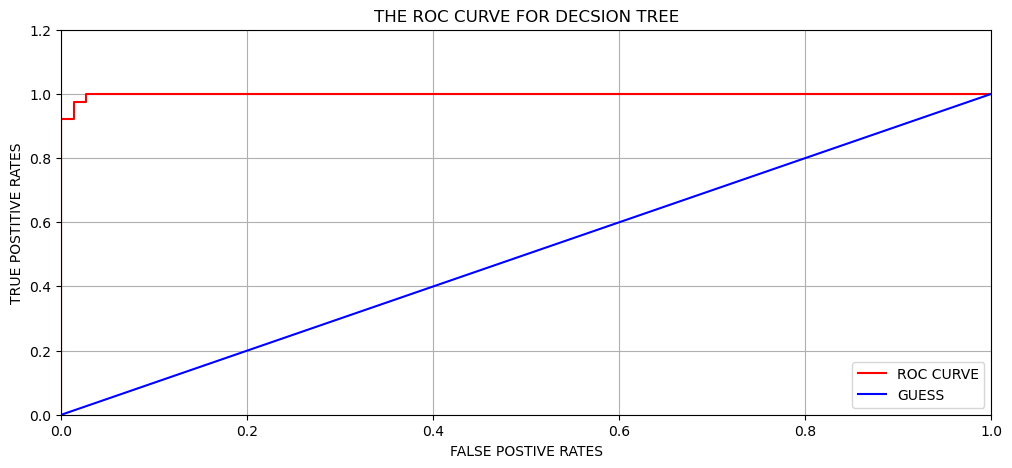

In [27]:
# PLOTING ROC_CURVE FOR LOGISTIC REGRESSION 

from sklearn.metrics import roc_curve,auc
Y_pred_proba_LG=model_LG.predict_log_proba(X_TEST)[:,1]
fpr,tpr, threshold=roc_curve(Y_TEST,Y_pred_proba_LG)
print(f'THE FALSE POSITIVE RATES ARE {fpr}, THE TRUE POSTIVE RATES ARE {tpr}')

AUC=auc(fpr,tpr)*100
print(f'THE AUC SCORE IS {AUC}')
plt.figure(figsize=(12,5))
plt.plot(fpr,tpr, label='ROC CURVE', color='RED')
plt.plot([0,1],[0,1],color='blue',label='GUESS')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.2])
plt.xlabel('FALSE POSTIVE RATES')
plt.ylabel("TRUE POSTITIVE RATES")
plt.legend(loc='lower right')
plt.title("THE ROC CURVE FOR DECSION TREE")
plt.grid(True)
plt.show()


In [28]:
# IMPLEMENTING DECSION TREE CLASSIFIER 

from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5,min_samples_leaf=4, random_state=10)
model_DT.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=5, random_state=10)

In [29]:
# PREDICTING OF X_TEST
Y_pred_DT=model_DT.predict(X_TEST)

In [30]:
# COMPUTING ACCURACY SCORE , CONFUSION MATRIX , CLASSIFICATION REPORT OF  DECISON TREE CLASSIFIER 
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,ConfusionMatrixDisplay
CM_DT=confusion_matrix(Y_TEST,Y_pred_DT)
ACCURACY_SCORE_DT=accuracy_score(Y_TEST,Y_pred_DT)
new_AC=ACCURACY_SCORE_DT*100
report_DT=classification_report(Y_TEST,Y_pred_DT)

print(f'THE CONFUSION MATRIX 0F DECSION TREE IS {CM_DT}')
print(f'THE ACCUCARY SCORE OF DECSIOON TREE IS {new_AC}%')
print(f'THE CLASSIFICATION REPORT OF DECSION TREE IS {report_DT}')

THE CONFUSION MATRIX 0F DECSION TREE IS [[72  3]
 [ 5 34]]
THE ACCUCARY SCORE OF DECSIOON TREE IS 92.98245614035088%
THE CLASSIFICATION REPORT OF DECSION TREE IS               precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.92      0.87      0.89        39

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [31]:
#  CROSS VALIDATION OF DECISON TREE CLASSIFIER 

from sklearn.model_selection import cross_val_score
cross_DT=cross_val_score(estimator=model_DT,X=X_TRAIN,y=Y_TRAIN,cv=10)
new_CV=format(cross_DT.mean()*100)
print(f'THE CROOS VALIDATION IS FOR DECSION TREE IS {new_CV}%')

THE CROOS VALIDATION IS FOR DECSION TREE IS 93.16908212560386%


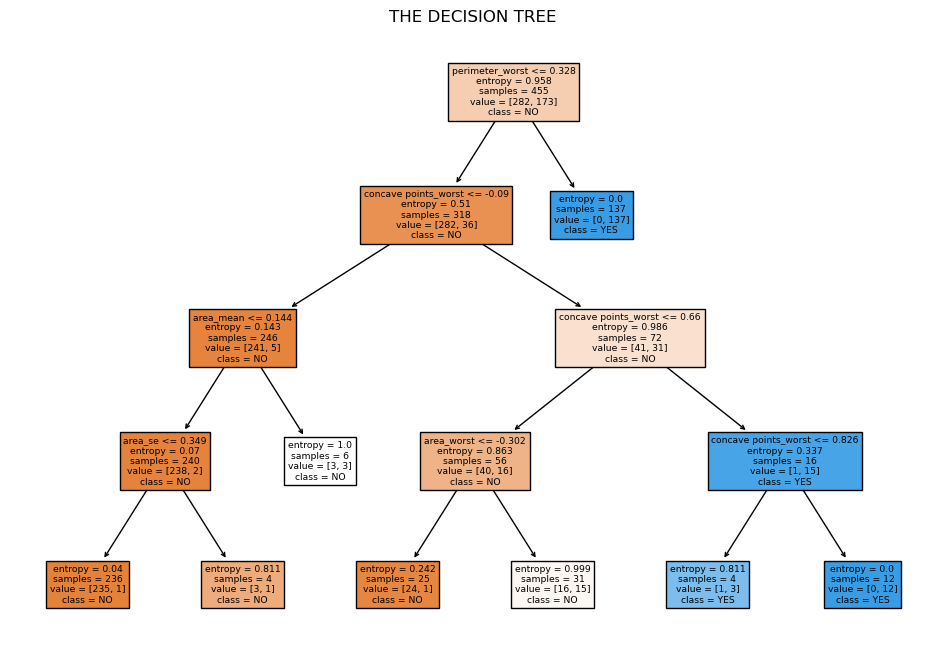

In [32]:
# VISULAZTION OF DECISON TREE CLASSIFIER 

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model_DT,filled=True,class_names=['NO','YES'],feature_names=X.columns)
plt.title('THE DECISION TREE ')
plt.show()

THE FALSE POSITIVE RATES ARE [0.         0.04       0.04       0.06666667 0.08       0.14666667
 1.        ], THE TRUE POSTIVE RATES ARE [0.         0.84615385 0.8974359  1.         1.         1.
 1.        ]
THE AUC SCORE IS 0.9755555555555555


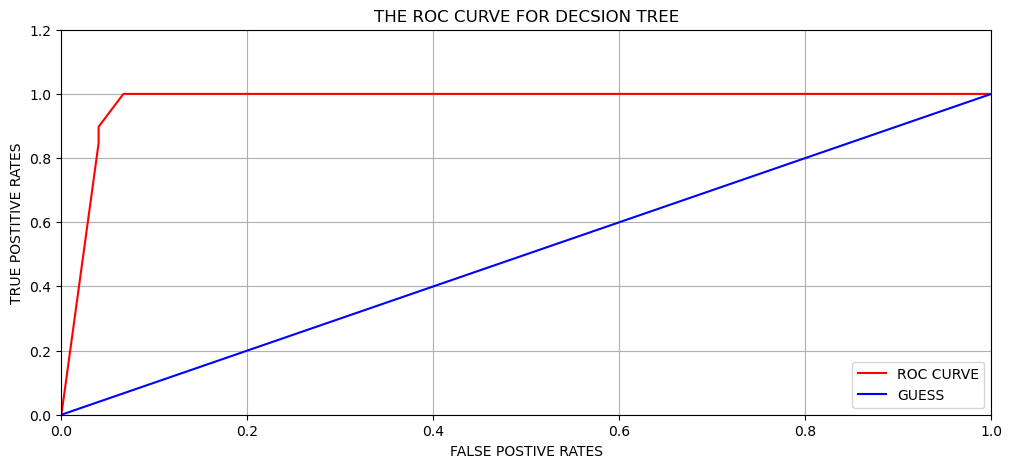

In [33]:
#  ROC CURVE FOR DECISON TREE CLASSIFIER 


from sklearn.metrics import roc_curve,auc
Y_pred_proba_DT=model_DT.predict_proba(X_TEST)[:,1]
fpr,tpr, threshold=roc_curve(Y_TEST,Y_pred_proba_DT)
print(f'THE FALSE POSITIVE RATES ARE {fpr}, THE TRUE POSTIVE RATES ARE {tpr}')

AUC=auc(fpr,tpr)
print(f'THE AUC SCORE IS {AUC}')
plt.figure(figsize=(12,5))
plt.plot(fpr,tpr, label='ROC CURVE', color='RED')
plt.plot([0,1],[0,1],color='blue',label='GUESS')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.2])
plt.xlabel('FALSE POSTIVE RATES')
plt.ylabel("TRUE POSTITIVE RATES")
plt.legend(loc='lower right')
plt.title("THE ROC CURVE FOR DECSION TREE")
plt.grid(True)
plt.show()


In [34]:
# IMPLEMENTING RANDOM FOREST CLASSIFIER USING GRID SERACH CV

from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV


In [35]:
paramters_grid={'n_estimators':[100,200],
                'max_depth':[5,6],
                "min_samples_split":[6,7],
                "min_samples_leaf":[4,5]}


grid_serach_mode=GridSearchCV(estimator=model_RF,param_grid=paramters_grid,cv=10,verbose=2,n_jobs=2)

grid_serach_mode.fit(X_TRAIN,Y_TRAIN)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_lea

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [5, 6], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [6, 7],
                         'n_estimators': [100, 200]},
             verbose=2)

In [36]:
print(f"THE BEST PARAMETERS ARE {grid_serach_mode.best_params_}")
print(f'THE BEST ESTIMATORE ARE {grid_serach_mode.best_estimator_}')

ACCURACY_SCORE_RF_GS=accuracy_score(Y_TEST,grid_serach_mode.predict(X_TEST))*100

THE BEST PARAMETERS ARE {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 200}
THE BEST ESTIMATORE ARE RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=200)


In [37]:
# CROSS VALIDATION OF RANDOM FOREST 

from sklearn.model_selection import cross_val_score
crosS_rf_gS=cross_val_score(estimator=model_DT,X=X_TRAIN,y=Y_TRAIN,cv=5)
neW_cv_g_=format(crosS_rf_gS.mean()*100)

print(F'THE CROSS VALIDATION OF RANDOM FOREST IS {neW_cv_g_}%')

THE CROSS VALIDATION OF RANDOM FOREST IS 93.18681318681318%


In [38]:
# IMPLEMENTING KNN 
from sklearn.neighbors import KNeighborsClassifier
model_K=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model_K.fit(X_TRAIN,Y_TRAIN)

KNeighborsClassifier()

In [39]:
y_Pred_k=model_K.predict(X_TEST)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,ConfusionMatrixDisplay
CM_K=confusion_matrix(Y_TEST,y_Pred_k)
AS=accuracy_score(Y_TEST,y_Pred_k)
new_as=AS*100
REPORT_K=classification_report(Y_TEST,y_Pred_k)

print(f'THE CONFUSIN MATRIX FOR K NEREAST NEIGHBOUT IS {CM_K}')
print(F'THE ACCURACY SCORE FOR K NEAREST NEIGHTBOR IS {new_as}%')
print(F'THE CLASSIFICATION REPORT  K NEREAST IS {REPORT_K}')

THE CONFUSIN MATRIX FOR K NEREAST NEIGHBOUT IS [[73  2]
 [ 2 37]]
THE ACCURACY SCORE FOR K NEAREST NEIGHTBOR IS 96.49122807017544%
THE CLASSIFICATION REPORT  K NEREAST IS               precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [41]:
# CROSS VALIDATION OF KNN

from sklearn.model_selection import cross_val_score
k_cross=cross_val_score(model_K,X=X_TRAIN,y=Y_TRAIN,cv=10)
new_k_cv=format(k_cross.mean()*100)
print(f'THE CROSS VADLIDATION FOR K NEREAST IS {new_k_cv}')

THE CROSS VADLIDATION FOR K NEREAST IS 94.487922705314


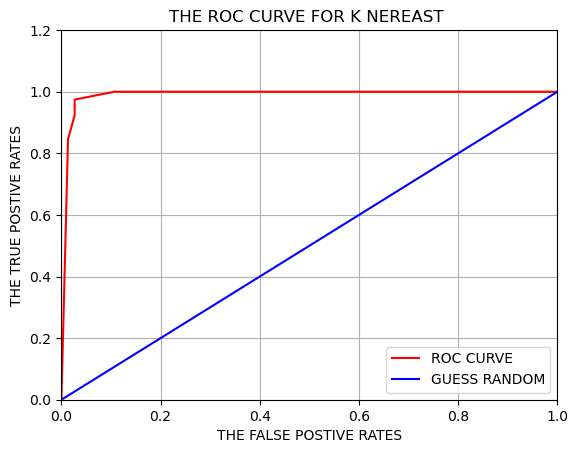

In [42]:
# ROC CURVE FOR KNN MODEL

from sklearn.metrics import roc_curve
Y_pred_proba_k=model_K.predict_proba(X_TEST)[:,1]
fpr,tpr,threshold=roc_curve(Y_TEST,Y_pred_proba_k)

plt.plot(fpr,tpr,color='red',label='ROC CURVE')
plt.plot([0,1],[0,1],color='blue',label='GUESS RANDOM')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.2])
plt.xlabel('THE FALSE POSTIVE RATES')
plt.ylabel('THE TRUE POSTIVE RATES')
plt.title('THE ROC CURVE FOR K NEREAST ')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [43]:
# CREATING TABLE FOR  BEST ACCURACY SCORE 
MODED_SELECTION_DF=pd.DataFrame({'MODELS':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier'
                                           ],
                                 'ACCURACY SCORE':[PERC_ASCORE,new_AC,ACCURACY_SCORE_RF_GS,new_as]})


MODED_SELECTION_DF.sort_values(by='ACCURACY SCORE',ascending=True)


,MODELS,ACCURACY SCORE
1,DecisionTreeClassifier,92.982456
2,RandomForestClassifier,95.614035
3,KNeighborsClassifier,96.491228
0,LogisticRegression,98.245614


In [44]:
Featured_df.columns


Index(['area_worst', 'perimeter_worst', 'concave points_mean',
       'concavity_mean', 'perimeter_mean', 'area_mean', 'area_se',
       'radius_worst', 'concave points_worst', 'smoothness_worst',
       'diagnosis'],
      dtype='object')

In [64]:
# TAKING INPUT FROM USER 

area_worst = float(input('ENTER area_worst: '))
perimeter_worst = float(input('ENTER perimeter_worst: '))
concave_points_mean = float(input('ENTER concave_points_mean: '))
concavity_mean = float(input('ENTER concavity_mean: '))
perimeter_mean = float(input('ENTER perimeter_mean: '))
area_se = float(input('ENTER area_se: '))
area_mean = float(input('ENTER area_mean: '))
radius_worst = float(input('ENTER radius_worst: '))
concave_points_worst = float(input('ENTER concave_points_worst: '))
smoothness_worst = float(input('ENTER smoothness_worst: '))

# CONVERTING INPUT INTO 2-D ARRAY 

input_entries = np.array([[
    area_worst, 
    perimeter_worst, 
    concave_points_mean, 
    concavity_mean, 
    perimeter_mean, 
    area_mean, 
    area_se, 
    radius_worst, 
    concave_points_worst, 
    smoothness_worst
]])




input_df=pd.DataFrame({'AREA WORST': [area_worst],
      'PERIMETER WORST': [perimeter_worst],
      'Concave Points Mean':[concave_points_mean],
      'Concavitymean':[concavity_mean],
      'Perimeter Mean':[perimeter_mean],
      'Area Mean':[area_mean],
      'Area Se': [area_se],
      'Radius Worst':[radius_worst],
      'Concave Points Worst':[concave_points_worst],
      'Smoothness Worst':[smoothness_worst]})


# USING RANDOM FOREST FOR PREDICTION 

output = grid_serach_mode.predict(input_entries)


if output[0] == 0:
    print("THE DIAGNOSIS IS MALIGNANT CONSULT A DOCTOR IMMEDIEATLIY")
elif output[0] == 1:
    print("THE DIAGNOSIS IS BENIGN  AND IT'S IS SAFE ")
else:
    print("NOT VALID INPUTS")

print(f'THE INPUT VALUES ARE:')
input_df



THE DIAGNOSIS IS BENIGN  AND IT'S IS SAFE 
THE INPUT VALUES ARE:


,AREA WORST,PERIMETER WORST,Concave Points Mean,Concavitymean,Perimeter Mean,Area Mean,Area Se,Radius Worst,Concave Points Worst,Smoothness Worst
0,200.0,100.0,0.22,10.0,0.22,100.0,12.0,0.22,0.22,12.0
